#### Dataset

In [2]:
# letterdata.csv
# https://mitu.co.in/dataset

In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('datasets/letterdata.csv')

In [5]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


#### Separate the input and output variables

In [7]:
x = df.drop('letter', axis = 1) 
y = df['letter']

In [8]:
x.shape

(20000, 16)

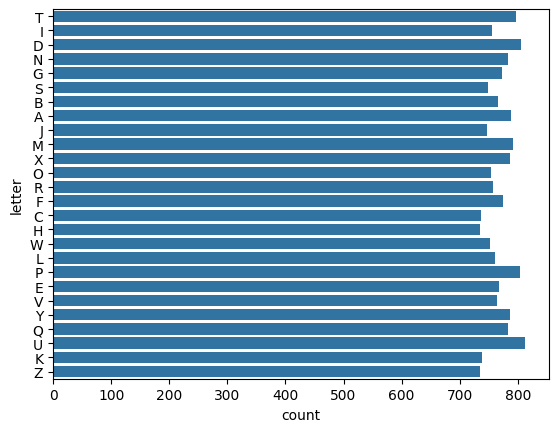

In [9]:
sns.countplot(y=y);

In [10]:
y.value_counts()

letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64

#### Cross Validation

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [14]:
x_train.shape

(15000, 16)

In [15]:
x_test.shape

(5000, 16)

#### Build the model

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [19]:
model = Sequential()

model.add(Input((16,)))

model.add(Dense(32, activation='relu'))

model.add(Dense(16, activation='relu'))

model.add(Dense(26, activation='softmax'))

In [20]:
from keras.utils import plot_model

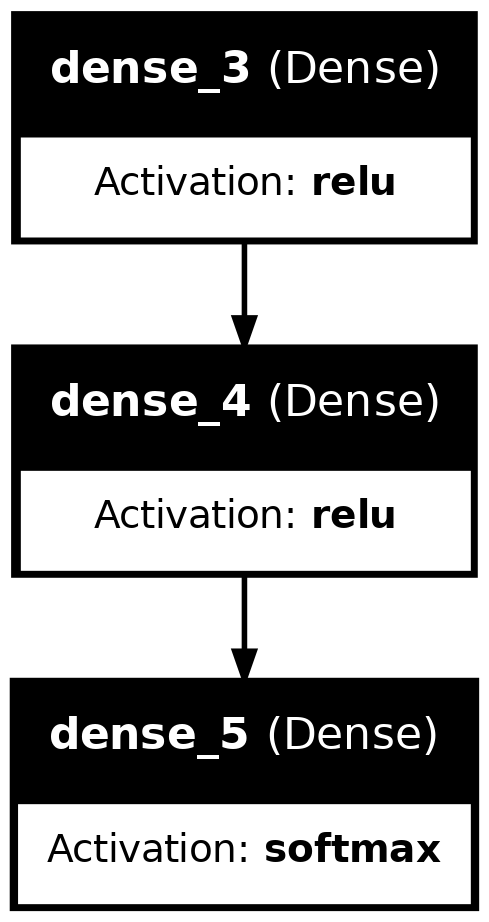

In [27]:
plot_model(model, show_layer_activations=True, show_layer_names=True)

#### Compile the model

In [49]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

#### Train the model

In [50]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [51]:
le = LabelEncoder()

In [52]:
y_le = le.fit_transform(y)

In [53]:
y_new = to_categorical(y_le)

In [57]:
y_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y_new, random_state=0)

In [58]:
model.fit(x_train, y_train, epochs=100, batch_size=5)

Epoch 1/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 948us/step - accuracy: 0.7943 - loss: 0.6680
Epoch 2/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 920us/step - accuracy: 0.7978 - loss: 0.6428
Epoch 3/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 939us/step - accuracy: 0.8023 - loss: 0.6547
Epoch 4/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 939us/step - accuracy: 0.8077 - loss: 0.6290
Epoch 5/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 929us/step - accuracy: 0.8071 - loss: 0.6340
Epoch 6/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 920us/step - accuracy: 0.8089 - loss: 0.6158
Epoch 7/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 899us/step - accuracy: 0.8107 - loss: 0.6031
Epoch 8/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8149 - loss: 0.5939
Epoch 9/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 889us/step - accuracy: 0.8215 - loss: 0.5930
Epoch 10/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 925us/step - accuracy: 0.8252 - loss: 0.5769
Epoch 11/100
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 929us/step - accuracy: 0.8249 - loss: 0.5675

#### Evaluate the model

In [60]:
model.evaluate(x_test, y_test, batch_size=1)

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 4s 850us/step - accuracy: 0.8619 - loss: 0.4656


[0.4600423276424408, 0.864799976348877]

In [74]:
new = x.iloc[[250],:]

In [75]:
new

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
250,1,9,1,7,1,7,7,0,9,7,6,8,0,8,3,8


In [76]:
model.predict(new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[2.6449138e-28, 1.1759766e-36, 2.7303303e-20, 1.5573911e-23,
        1.2977804e-13, 5.5692850e-14, 6.6760880e-24, 1.5001872e-23,
        1.0000000e+00, 7.4969015e-12, 2.6136014e-20, 8.2811102e-12,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0149982e-19,
        1.1535967e-20, 1.1780186e-30, 9.9244129e-16, 5.5553695e-09,
        2.9878455e-35, 0.0000000e+00, 0.0000000e+00, 2.5926122e-10,
        2.5723890e-24, 1.0600237e-25]], dtype=float32)

In [77]:
model.predict(new).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


8

In [78]:
le.inverse_transform([8])

array(['I'], dtype=object)

In [81]:
le.inverse_transform([model.predict(new, verbose=False).argmax()])[0]

'I'